In [6]:
import cairo

ncols, nbanks, nsections, nrows = 4096, 8, 16, 14
_32k = 32768
shape = (17500, 17500)

def draw_dots(context, x_start, y_start, bits):
    # Set dot radius and gap between dots
    dot_radius = 1.25
    dot_gap = 1.75

    # Loop to draw `ncols` dots
    for i in range(ncols):
        # Calculate dot position
        x =  x_start + (i * (2 * dot_radius + dot_gap)) + dot_radius
        if x > shape[0]:
            print("x overflow", x, i)
            break
        if y_start > shape[1]:
            print("y overflow", y_start, i)
            break

        # Alternate between green and red colors
        if bits[i] == '0':
            context.set_source_rgb(0, 1, 0)  # Green color
        else:
            context.set_source_rgb(1, 0, 0)  # Red color

        # Draw the dot
        context.arc(x, y_start, dot_radius, 0, 2 * 3.14159)  # Full circle
        context.fill()

In [7]:
def drawMMB():
    # Create a Cairo ImageSurface
    surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, shape[0], shape[1])
    context = cairo.Context(surface)

    y_start = 317
    bank_sep = 150
    row_sep = 7

    for bank in range(nbanks):
        print(f"drawing bank {bank}")
        for row in range(nrows):
            y = y_start + (bank * bank_sep) + (row * row_sep)
            draw_dots(surface, context, 20, y, ['0', '1'] * int(ncols/2))

    print(y)
    surface.write_to_png("mmb.png")
    print("done.")
# drawMMB()

In [8]:
f = open("test_bits.txt", "r")
lines = f.read().split("\n")[:14]
f.close()

In [9]:
from io import BytesIO
import IPython.display

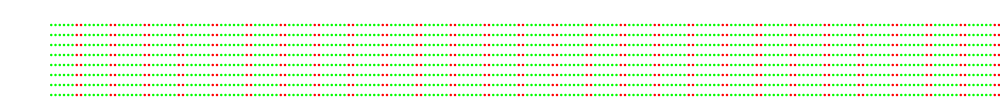

In [12]:
svgio = BytesIO()
with cairo.SVGSurface(svgio, 1000, 100) as surface:
    context = cairo.Context(surface)
    context.set_source_rgba(1, 1, 1, 1)

    bank_sep, vr_sep = 175, 10
    y_start = 25

    bank, vr = 0, 0
    for i in range(len(lines)): #iterate over masks (lines[i])
        prev = 0
        for curr in range(ncols, len(lines[i])+1, ncols):
            # print(prev, curr)
            bank = (curr / ncols) - 1
            y = y_start + (bank_sep * bank) + (vr_sep * i)
            # print(f"y: {y}")
            draw_dots(context, 50, y, lines[i][prev:curr])
            prev = curr
    # surface.write_to_png("./tmp.png")
IPython.display.SVG(data=svgio.getvalue())

In [71]:
# greeking? svg level of detail/bounding box

32768

In [52]:
def drawL1():
    surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 17500, 17500)

    y_start = 50
    vmr_sep, vmr_count = 5, 48
    section_sep, section_count = 350, 4
    bank_sep, bank_count = 2000, 8 


    for bank in range(bank_count):
        print(f"drawing bank {bank}")
        for section in range(section_count):
            for vmr in range(vmr_count):
                y = y_start + (bank * bank_sep) + (vmr * vmr_sep) + (section * section_sep)
                draw_dots(surface, 50, y)
    
    # surface.write_to_png("l1.png")
    print("done.")